# Lab02 - Multi-modal and Multi-task

Austin Modoff, Jack Easton, Will Bjorndahl

# Dataset Overview

What is the classification task and what is the format of the feature data. Is this multi-task, multi-modal, or both? Explain.

We will be using the CogPilot multi-modal/multi-task biometric competition dataset, discussed in this paper. For this lab, the classification task is to predict the cumulative total error of a pilot's flight simulation run using their biometric data during the VR flight simulation. For this dataset, 34 pilots were subject to 3 rounds of 4 tests each with difficulty 1-4, with 4 being the hardest difficulty. Parameters such as wind-speed, turbulence, and visibility were varied to reflect the difficulty of the test. As the pilots performed the test, biometrics of the pilots such as eye movement, pupil diameter, heartrate, and respiratory data were measured. Prior to the test, metrics on the pilot's performance such as total cumulative error were calculated according to how much the pilot deviated from an ideal path. The deviation error was captured in three dimensions, angular deviation from ideal horizontal path, vertical path, and speed ideal path velocity. Furthermore, the angular deviation was capped at +-3 degrees and the velocity capped at +- 3 m/s. All three errors were monitored and recorded at each time step during the pilot test run.

For each pilot test, the study provides data in multiple forms. They provide the raw timeseries data from the attached biometric sensors as well as statistics that they calculated and collated into feature sets such as eye saccade (small eye micro-movements) peak velocity mean and mean pupil diameter. We focused primarily on the collated feature set for this lab.  

This dataset is both multi-task and multi-modal. Our classification target is to predict the cumulative error of each pilot's simulation run using their biometric data. Therefore, each pilot is considered an individual task because each pilot will react to a test difficulty in different ways according to their flying experience and background. This dataset is multi-modal because we have a wide range of biometric sources each delivering a different mode of information. Even within the biometric data classes such as the eye data, multimodal information is present. For example, eye movement and pupil diameter are both signals measured from the eye however they each reveal different aspects of how the pilot is feeling and how they may be performing. This paper explains in further detail all the various multimodal data that can be extrapolated from eye tracking.

Who collected the data? Why? When?

According to this paper, the dataset and the corresponding competition was hosted by the Department of the Air Force - MIT Artificial Intelligence Accelerator in 2022.  The goal was to optimize pilot training via research conducted by academic and government institutions. This dataset was published Sept 8, 2022.

What evaluation criteria will you be using and why? 

We will evaluate the success of our models according to three criteria:

Bland-Altman Test:

According to [3], "the Bland Altman test is a test that evaluates agreement between two quantitative measurements by studying the mean difference and constructing limits of agreement." The y-axis of the plot displays the difference between the two measurements and the x-axis displays the mean between the measurements. The difference calculation gives us insight into how different the predicted measurements and true results are. The mean calculation puts that difference into context and allows the points to be plotted in a scatter plot manner. The distribution of the scattered points also reveal important information such as positive or negative bias around the 0 point of the y-axis. Furthermore, the Bland-Altman Test constructs limits of agreement using the mean and standard deviation of the difference between the two means [3]. According to the desired accuracy, the bounds of the limit can be modified. Generally bounds of twice the standard deviation of the difference of the means are utilized. If a majority of the scattered points are distributed within the limits then it is likely that the measurements agree according to the desired accuracy. 

Root Mean Squared Error:

The Root Mean Squared Error (RMSE) is one of the metrics the  Pilot Performance Competition is using to evaluate submitted models in the Predict Performance Error task. Their reason is that it "Measure[s] absolute differences of predicted vs. truth" [1]. We agree that the RMSE is a good evaluation metric for predicting pilot performance error. We believe it is important to measure the distance between the values of the predicted pilot performance error and the actual pilot performance error. This is represented in the numerator of the RMSE equation, shown below. The numerator is divided by the number of data points, N, so the RMSE can be reported for a singular observation rather than reporting a total error. That way, we can get an idea of what type of error (how far off) our model will be on a future prediction.  Root mean Squared Error is calculated by


$$
\begin{aligned}
\text{RMSE}(y, \hat{y}) = \sqrt{\frac{\sum_{i=0}^{N - 1} (y_i - \hat{y}_i)^2}{N}}
\end{aligned}
 $$

where N is the number of data points, $y_i$ is the actual value (for the i'th data point) and $\hat{y}_i$ is the predicted value (for the i'th data point). A lower RMSE value is desired, showing that the predicted pilot performance error value is close to the actual predicted pilot performance error value.

One could argue, why not use Mean Absolute Error (MAE) instead of RMSE? The MAE measures the average magnitude of the distance (error) between the predicted and actual value [4]. $\text{MAE}(y, \hat{y}) = \frac{ \sum_{i=0}^{N - 1} |y_i - \hat{y}_i| }{N}$. MAE and RMSE both show the average model prediction error, where a lower score is desired and a score of 0 shows the predicted and actual values are the same. The differences between the two is that the RMSE takes the square root of the averaged squared error, producing high weights to large errors. In our prediction task (pilot performance error), we want possible large errors to be seen, showing that there can be improvements on the prediction model, allowing us to make improvements.



Pearson Correlation Coefficient:

The Pearson Correlation Coefficient is one of the metrics the Pilot Performance Competition is using to evaluate submitted models in the Predict Performance Error task. Their reason is that it "Captures the strength of relationship between predicted vs. truth" [1]. We agree that Person Correlation Coefficient is a good evaluation metric for predicting pilot performance error. A value of 1 represents a perfect positive relationship and a value of -1 represents a perfect negative relationship. A value of 0 represents no relationship between the predicted and actual pilot performance error. While there are various correlation coefficients, we use the Pearson Correlation Coefficient because it is sensitive to outlier data points. Our dataset is relatively small for a machine learning dataset, so we believe keeping all data, including outliers, is important. One downside of the Pearson Correlation Coefficient is that it only assesses data that is of a linear relationship. Because of that, we will also keep track of a different correlation coefficient called the Spearman Rank Correlation Coefficient. Before we discuss that, the calculation for the Pearson Correlation Coefficient is

$$

\begin{aligned}

r = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2(y_i - \overline{y})^2}}

\end{aligned}

$$

where $x_i$ is the actual pilot performance error value and $y_i$ is the predicted pilot performance error value, $\bar{x}$ is the mean of the acutal pilot performance error value and $\bar{y}$ is the mean of the predicted pilot performance error value.     

Spearman Rank Correlation Coefficient:

The Spearman Rank Correlation Coefficient is one of the metrics the Pilot Performance Competition is using to evaluate submitted models in the Predict Performance Error task. Their reason is that it "Assess robustness to outlier influence" [1]. We agree that Spearman Rank Correlation Coefficient is a good evaluation metric for predicting pilot performance error. Correlation is good to consider in our evaluation because it tells us how strong the relationship is between the predicted and actual pilot performance error value. Spearman Rank correlation works with both linear and non-linear data. This value will be close to 1 when the predicted and actual values are similar and close to -1 when these values are dissimilar. A value of 0 means there is no correlation between the predicted and actual pilot performance error value. We strive to have a Spearman Rank correlation coefficient close to 1. 

$$

\begin{aligned}

\rho = 1- {\frac {6 \sum d_i^2}{n(n^2 - 1)}}
\\
\\
d_i = R(y_i) - R(\hat{y_i})

\end{aligned}

$$

where $d_i$ is the difference between the two ranks of the actual and predicted pilot performance error values, and n is the number of observations.

We decided to use the Spearman Rank Correlation Coefficient as an evaluation criteria in addition to the Pearson Correlation Coefficient. This will allow us flexibility to work with data that is both monotonic (non-linear) and monotonic linear. We can also compare these two correlation values to see if strong outliers affect the strength of the relationship between the predicted and actual pilot performance error values. 

Works Cited:

[1] https://pilotperformance.mit.edu/cogpilot-data-challenge-20-description

[2] https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

[3] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4470095/

[4] https://en.wikipedia.org/wiki/Mean_absolute_error

In [2]:
import tensorflow as tf
print(tf.__version__)

2023-03-11 01:56:17.175458: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-11 01:56:17.276531: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-11 01:56:17.279803: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-11 01:56:17.279819: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [3]:
# !pip install --upgrade pip
# !pip install tensorflow==2.11
# # Then click button that moves it to requirements.txt
# Then restart kernel, print(tf.__version__) should now show 2.11
# !pip install tensorflow_probability

# Data Preparation

## Data Acquisition

We load in the preprocessed feature matrix from the starter code provided to us for the competition. This multi-modal data was created from the timeseries data  of the eye oculomotor. The timeseries data was post processed to create important eye information described in further detail below:

Gaze entropy (overall_gaze_entropy): this feature describes the entropy (randomness) of the eye fixation throughout the test simulation and is calculated using the Shannon's entropy equation 

Power Spectral Density Frequency of max (psd_freq_of_max): this feature describes the frequency with the largest amplitude in the spectral decomposition of the pupil position timeseries data. 

Power Spectral Density max (psd_max): this feature describes the amplitude of the frequency with the largest amplitude in the spectral decomposition of the pupil position timeseries data. 

Eye closed Fraction (eyes_closed_fraction): This described the portion of the simulation that the eye was closed.

Pupil diameter statistics (pupil_diameter_xxx): There are four moments calculated from the pupil diameter timeseries data. Mean, which indicate the central tendency of the measurement. Standard deviation, which indicates the variability of the data around the mean. The skew which indicates the asymmetry around the mean. The kurtosis which indicates the heaviness of the tails of the distribution and give insight into how many outliers are in the dataset. [2]

Fixture Duration statistics (fix_dur_xxx): The fixture duration describes the time that an eye is fixated and focused on a specific spot. Four moments are calculated from this fixture data, mean, standard deviation, skew, and kurtosis. 

Fixture Density statistics (fix_dur): The fixture density describes the density of the locations scanned by the pilot's eye during the simulation. Four moments are calculated from this fixture data, mean, standard deviation, skew, and kurtosis. 

Saccade Main Sequence (sac_main_seq_xxx): Saccade is an attribute of eye movement characterized by quick eye micromovements between areas of interest. The eye cannot focus during these movements and have been empirically shown to correlate to stress and cognitive demand. The saccade main sequence characterizes the relationship between saccade peak velocity, duration, and amplitude and is computed as a best fit line between peak velocity x duration and amplitude for each saccade [3]. Two moments are calculated for this distribution, mean and standard deviation. (This description was pulled from their data processing document).

Saccade Main Velocity (sac_peak_vel_xxx): This describes the peak velocity of the saccade within the timeseries data of the pupil position. The mean and standard deviation are calculated for these measurements.

Works Cited:

[1] https://www.nature.com/articles/s41598-018-20588-7#:~:text=Based%20on%20such%20concept%2C%20stationary,in%20a%20given%20timeframe31.

[2] https://www.risk.net/definition/moments-of-a-statistical-distribution#:~:text=1)%20The%20mean%2C%20which%20indicates,to%20either%20left%20or%20right.

[3] https://physionet.org/content/virtual-reality-piloting/1.0.0/starterCode/Step2_OculomotorAggregateFeatures.ipynb

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
dataDirDev = "/work/dataPackage"
featDirDev = "/work/data_feats"

expType = "task-ils"

os_sep = os.path.sep

In [6]:
# adapted from competition starter code
# link: https://physionet.org/content/virtual-reality-piloting/1.0.0/
import plotData

featMatDF = pd.read_csv(featDirDev + os_sep + 'devSubjsFeatMat.csv')
perfMetricsDF = pd.read_csv(dataDirDev + os_sep +
                            expType + os_sep +
                            "PerfMetrics.csv");

mergedDF = plotData.alignFeatPerfRows(featMatDF, perfMetricsDF)

# Specifying which of the columns in mergedDF to use for the feature matrix to be input to the predictive models.
featCols = ['overall_gaze_entropy_LX', 'psd_max_LX', 'psd_freq_of_max_LX',
            'overall_gaze_entropy_LY', 'psd_max_LY', 'psd_freq_of_max_LY',
            'overall_gaze_entropy_LZ', 'psd_max_LZ', 'psd_freq_of_max_LZ',
            'overall_gaze_entropy_RX', 'psd_max_RX', 'psd_freq_of_max_RX',
            'overall_gaze_entropy_RY', 'psd_max_RY', 'psd_freq_of_max_RY',
            'overall_gaze_entropy_RZ', 'psd_max_RZ', 'psd_freq_of_max_RZ',
            'eyes_closed_fraction_L', 'eyes_closed_fraction_R',
            'pupil_diam_mean_L', 'pupil_diam_stdev_L', 'pupil_diam_skew_L', 'pupil_diam_kurt_L',
            'pupil_diam_mean_R', 'pupil_diam_stdev_R', 'pupil_diam_skew_R', 'pupil_diam_kurt_R',
            'fix_dur_mean', 'fix_dur_stdev', 'fix_dur_skew', 'fix_dur_kurt',
            'fix_density_mean', 'fix_density_stdev', 'fix_density_skew', 'fix_density_kurt',
            'sac_main_seq_mean', 'sac_main_seq_stdev',
            'sac_peak_vel_mean', 'sac_peak_vel_stdev',
            'difficulty']

subjects = mergedDF['Subject_x'].unique()

print("subjects :\n",subjects)

subjects :
 ['sub-cp004' 'sub-cp005' 'sub-cp006' 'sub-cp008' 'sub-cp009' 'sub-cp011'
 'sub-cp012' 'sub-cp013' 'sub-cp014' 'sub-cp015' 'sub-cp016' 'sub-cp017'
 'sub-cp018' 'sub-cp019' 'sub-cp020' 'sub-cp022' 'sub-cp023' 'sub-cp024'
 'sub-cp025' 'sub-cp026' 'sub-cp027' 'sub-cp028' 'sub-cp029' 'sub-cp030'
 'sub-cp031' 'sub-cp032' 'sub-cp033' 'sub-cp035' 'sub-cp036' 'sub-cp037'
 'sub-cp038' 'sub-cp039' 'sub-cp042' 'sub-cp043']


## Data Pre-processing

In [7]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.utils import Bunch

In [8]:
# fit scaler on feature data so we can control input space later
X = np.array(mergedDF[featCols])
feature_scaler = StandardScaler().fit(X)

print('We have an input array of shape',X.shape)

We have an input array of shape (405, 41)


In [9]:
# fit scaler on output data so we can control output space later
y = np.array(mergedDF['cumulative_total_error']).reshape(-1,1)
output_scaler = StandardScaler().fit(y)

print('We have an output array of shape',y.shape)

We have an output array of shape (405, 1)


In [10]:
# adapted from LectureNotesMaster/03_LectureMulitTask.ipynb
tasks = dict()

# separate data into groups for each pilot
grouped = mergedDF.groupby('Subject_x')
for i,subject in enumerate(subjects):
    # get data and output for current pilot
    df = grouped.get_group(subject)
    X = np.array(df[featCols])
    y = np.array(df['cumulative_total_error']).reshape(-1,1)

    # standardize feature and output data
    X = feature_scaler.transform(X)
    y = output_scaler.transform(y)
    
    # create sklearn Bunch to hold our features and output for the current pilot
    sid = "Pilot {}".format(i+1)
    tasks[sid] = Bunch(
        data=X,
        target=y,
        DESCR="Pilot data: subject {}".format(i+1)
    )

In [11]:
print('Number of subjects in dataset:',len(tasks.keys()))

Number of subjects in dataset: 34


In [12]:
# We want to track an additional metric: pearson correlation coefficient (described in the introduction)

import tensorflow_probability as tfp
from keras import backend as K
from scipy.stats import spearmanr

def pearson_corr_coeff(y_true,y_pred):
    # Function found here https://github.com/WenYanger/Keras_Metrics
    epsilon = 10e-5 #smoothing, so no NaN vals
    x = y_true
    y = y_pred
    mx = K.mean(x) #compute mean of y_ture # Switched out K with np
    my = K.mean(y) #compute mean of y_pred
    xm, ym = x - mx, y - my #y_true minus mean y_true, x_true minus mean x_true
    r_num = K.sum(xm * ym) #sum, numerator of equation
    x_square_sum = K.sum(xm * xm) #sq sum of y_true mean
    y_square_sum = K.sum(ym * ym) #sq sum of y_pred mean
    r_den = K.sqrt(x_square_sum * y_square_sum) #denominator of equation
    r = r_num / (r_den + epsilon) #add smoothing constant in case of NaN
    return K.mean(r)
    #return tfp.stats.covariance(y_true,y_pred)/(tfp.stats.stddev(y_true)*tfp.stats.stddev(y_pred))

def spearman_rank_corr_coeff(y_true, y_pred):
     return ( tf.py_function(spearmanr, [tf.cast(y_pred, tf.float32), 
                       tf.cast(y_true, tf.float32)], Tout = tf.float32) )

In [95]:
# adapted from LectureNotesMaster/03_LectureMulitTask.ipynb
from sklearn.metrics import mean_squared_error as sk_mean_squared_error

def bland_altman_plot(data1, data2, scaler, *args, **kwargs):
    # scale data back to original scale
    data1     = scaler.inverse_transform(np.asarray(data1).reshape(-1, 1) )
    data2     = scaler.inverse_transform(np.asarray(data2).reshape(-1, 1) )

    # calculate plotting parameters
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference

    pcc       = pearson_corr_coeff(tf.convert_to_tensor(data1, np.float32),tf.convert_to_tensor(data2, np.float32)).numpy()
    scc       = spearman_rank_corr_coeff(data1.astype(np.double),data2.astype(np.double)).numpy()

    title_str = "Bland Altman\n" + \
        "MSE: " + str(round(sk_mean_squared_error(data1,data2),3)) + "    " + \
        "RMSE: " + str(round(np.sqrt(sk_mean_squared_error(data1,data2)),3)) + "    " + \
        "Pearson CC: " + str(round(pcc,3)) + "    " + \
        "Spearman CC: " + str(round(scc,3))

    # plot
    plt.figure(figsize=(15,10))
    plt.scatter(mean, diff, *args, **kwargs)
    plt.axhline(md,           color='gray', linestyle='--')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')
    plt.title(title_str)
    plt.xlabel('Mean Score', fontsize=8)
    plt.ylabel('Diff Score', fontsize=8)
    plt.show()

# Models

The following modeling code was adapted from LectureNotesMaster/03_LectureMulitTask.ipynb.

In [14]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten
from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mean_squared_error

from random import shuffle

from sklearn.model_selection import train_test_split

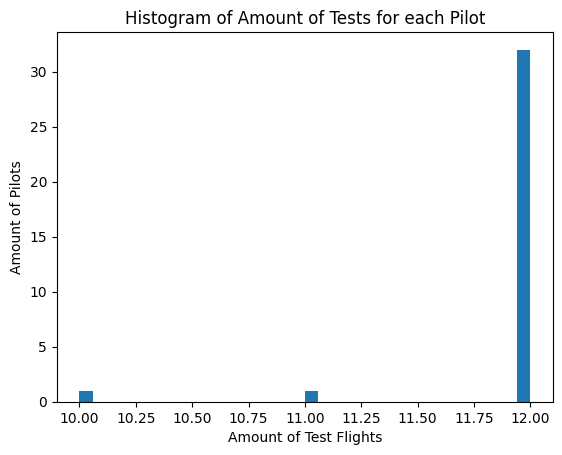

In [15]:
examples = [len(tasks[key].data) for key in tasks.keys()]

#print(np.sum(examples))
plt.hist(examples, bins=34)
plt.title('Histogram of Amount of Tests for each Pilot')
plt.xlabel('Amount of Test Flights')
plt.ylabel('Amount of Pilots')
plt.show()

For this dataset, 34 Pilots were subject to 3 Rounds of 4 tests each with difficulty 1-4 according to this paper. We consider each Pilot as a task and given that there are only 12 simulation runs per pilot, we believe that it is necessary to use all 34 Pilots and all of their tests. Due to the limited data, we must ensure that we stratify according to test difficulty within each task to ensure that the training dataset has a roughly equal amount of difficulties for each pilot and that the test data test at least one of each difficulty per pilot. Given that there are roughly 12 runs for each pilot, we will stratify-split the data into 4/12 ~ 35% Test and 65% Training data.

In [16]:
# create training and testing data
# for each task
X_train = dict()
y_train = dict()
X_test = dict()
y_test = dict()

for x in tasks.keys():
    # we are stratifying based on the difficulty level
    X_train[x], X_test[x], y_train[x], y_test[x] = train_test_split(tasks[x].data, 
                                                        tasks[x].target, 
                                                        test_size=0.35, 
                                                        random_state=42,
                                                        stratify = tasks[x].data[:,:][:,-1])

In [17]:
# metrics we want to track for each model
metrics = ["RootMeanSquaredError",pearson_corr_coeff,spearman_rank_corr_coeff]

## Independent Pilot Models

In this section, we want to see how personal models for each pilot perform on our dataset. We create 34 unique multilayer perceptrons for each and train them individually based on that pilot's simulation data.

In [18]:
# adapted from LectureNotesMaster/03_LectureMulitTask.ipynb
def create_mlp(input_dim, dense1, dense2):
    '''
    Create 2-layer MLP with variable layer units and single output
    '''
    # structure of MLP
    mlp = Sequential()
    mlp.add( Dense(input_dim=input_dim, units=dense1, activation='relu', name=f"input_dense{dense1}"))
    mlp.add( Dense(units=dense2, activation='relu', name=f"mid_dense{dense2}") )
    mlp.add( Dense(1, activation='linear', name="output_layer") )

    # compile
    mlp.compile(loss='mean_squared_error',
                optimizer='rmsprop',
                metrics=[metrics])
    
    return mlp

In [19]:
# adapted from LectureNotesMaster/03_LectureMulitTask.ipynb
# concatinate training/testing data across all of the pilots
all_data = {"data": [], "target": [], "data_test": [], "target_test": []}
for x in tasks.keys():
    all_data["data"].append(X_train[x])
    all_data["target"].append(y_train[x])        
    all_data["data_test"].append(X_test[x])
    all_data["target_test"].append(y_test[x])

# convert to single vector with all data
X_train_all = np.concatenate(all_data["data"])
y_train_all = np.concatenate(all_data["target"])

X_test_all = np.concatenate(all_data["data_test"])
y_test_all = np.concatenate(all_data["target_test"])

In [20]:
%%time
# adapted from LectureNotesMaster/03_LectureMulitTask.ipynb

y_ind=[]
yhat_ind=[]

# train model for each pilot
for x in tasks.keys():
    print("Training model for", x)
    # create basic MLP and fit
    mlp = create_mlp(
        input_dim=X_train[x].shape[1],
        dense1=30, dense2=15
    )
    history_independent = mlp.fit(X_train[x], y_train[x], epochs=5, shuffle=True, validation_data=(X_test_all,y_test_all),verbose=1)
    
    # make predictions
    yhat_mlp = mlp.predict(X_test[x],verbose=0)

    # save results
    y_ind.append(y_test[x].ravel())
    yhat_ind.append(yhat_mlp.ravel())
    

Training model for Pilot 1
Epoch 1/5
2023-03-11 01:56:20.405104: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-11 01:56:20.405132: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-11 01:56:20.405148: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-d4e4a66a-823a-485c-ae16-68e79ef46f18): /proc/driver/nvidia/version does not exist
2023-03-11 01:56:20.405352: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate comp

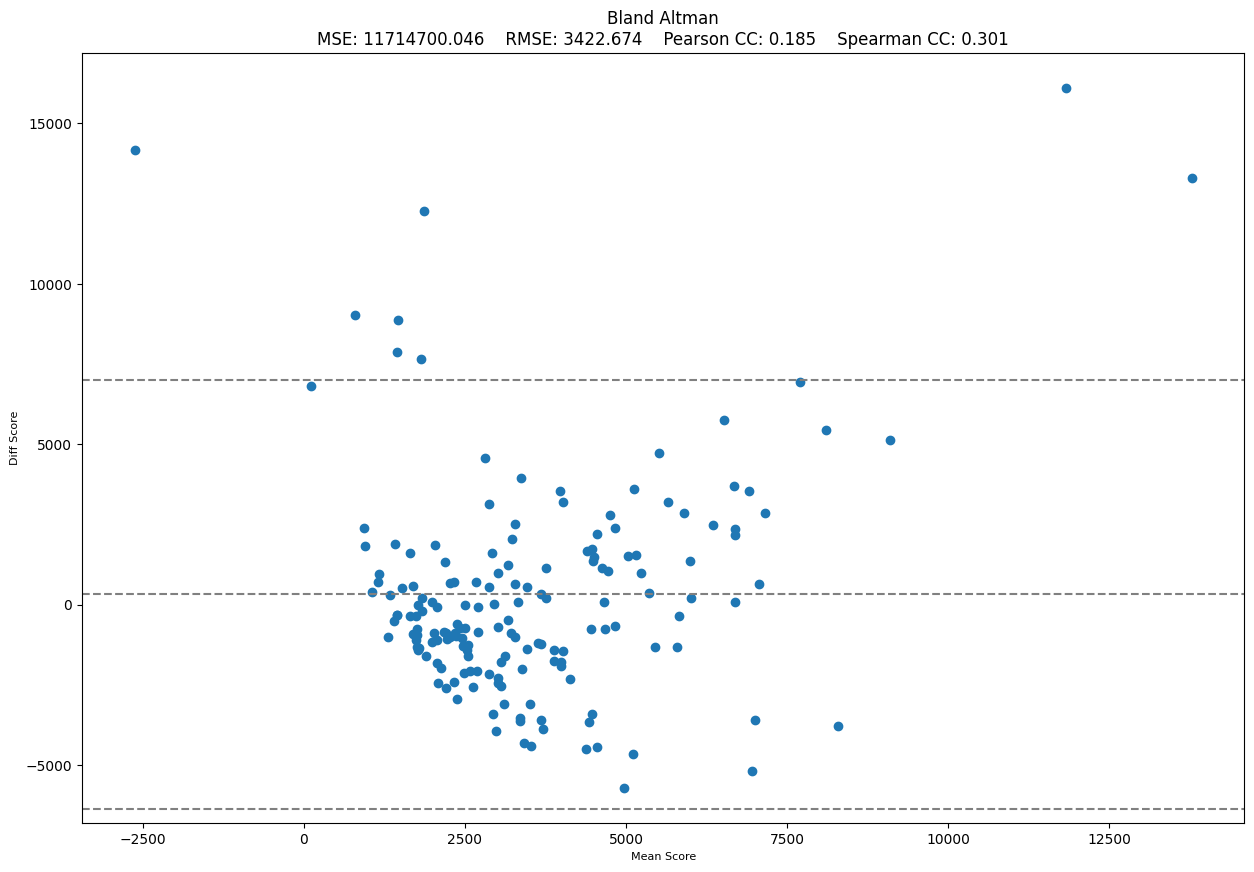

In [96]:
# concatenate results and take bland-altman output result
bland_altman_plot(np.concatenate(y_ind), 
                  np.concatenate(yhat_ind),
                  output_scaler
                  )

From the Bland-Altman plot above, we can see that the root-mean-square error for individual models on our dataset is just under 3,000. The majority of our data falls between a mean of 2,000 and 4,000, so an error of around 3,000 is pretty high. We should expect this value to be high, however, because we have an extremely limited amount of data to work with. Each pilot only performed 12 simulations total, three at each of the four difficulty levels. We also see that the pearson correlation coefficient is pretty close to zero. This reflects a low correlation between our predicted values and truth, which means that our predictions do not follow the pattern of our true values very closely.

The Bland-Altman plot also displays some information about the accuracy of our guesses as the mean score increases. It looks like our model becomes more distributed when the mean score grows. With the exception of a few outliers, though, the majority of our predictions fall within two standard deviations of the difference between y_true and y_pred, which validates the consistency across mean scores to some degree.

## General Pilot Model

With such limited data for each pilot, it is natural to try a model that uses all of the pilot data (concatenate all of the modalities across all of the pilots) instead of building multiple models on only twelve simulations. In this section, we build such a model. We now have one general multilayer perceptron that makes one prediction for the general flight performance error.

In [22]:
# adapted from LectureNotesMaster/03_LectureMulitTask.ipynb
# create MLP with concatinated input
generalized_mlp = create_mlp(
    input_dim=X_train_all.shape[1],
    dense1=32, dense2=16
)

# fit to concatinated data
history_general = generalized_mlp.fit(X_train_all, y_train_all, epochs=20, 
                    shuffle=True, verbose=1, validation_data=(X_test_all,y_test_all))

# make predictions
y_hat_general = generalized_mlp.predict(X_test_all)

Epoch 1/20
8/8 [==============================] - 0s 20ms/step - loss: 1.1860 - root_mean_squared_error: 1.0891 - pearson_corr_coeff: -0.0842 - spearman_rank_corr_coeff: -0.1401 - val_loss: 1.0663 - val_root_mean_squared_error: 1.0326 - val_pearson_corr_coeff: -0.1589 - val_spearman_rank_corr_coeff: -0.1194
Epoch 2/20
8/8 [==============================] - 0s 5ms/step - loss: 1.0674 - root_mean_squared_error: 1.0332 - pearson_corr_coeff: 0.0977 - spearman_rank_corr_coeff: -0.0176 - val_loss: 1.0076 - val_root_mean_squared_error: 1.0038 - val_pearson_corr_coeff: -0.0888 - val_spearman_rank_corr_coeff: -0.0344
Epoch 3/20
8/8 [==============================] - 0s 5ms/step - loss: 1.0027 - root_mean_squared_error: 1.0014 - pearson_corr_coeff: 0.1953 - spearman_rank_corr_coeff: 0.0731 - val_loss: 0.9593 - val_root_mean_squared_error: 0.9794 - val_pearson_corr_coeff: -0.0214 - val_spearman_rank_corr_coeff: 0.0066
Epoch 4/20
8/8 [==============================] - 0s 5ms/step - loss: 0.9537 - 

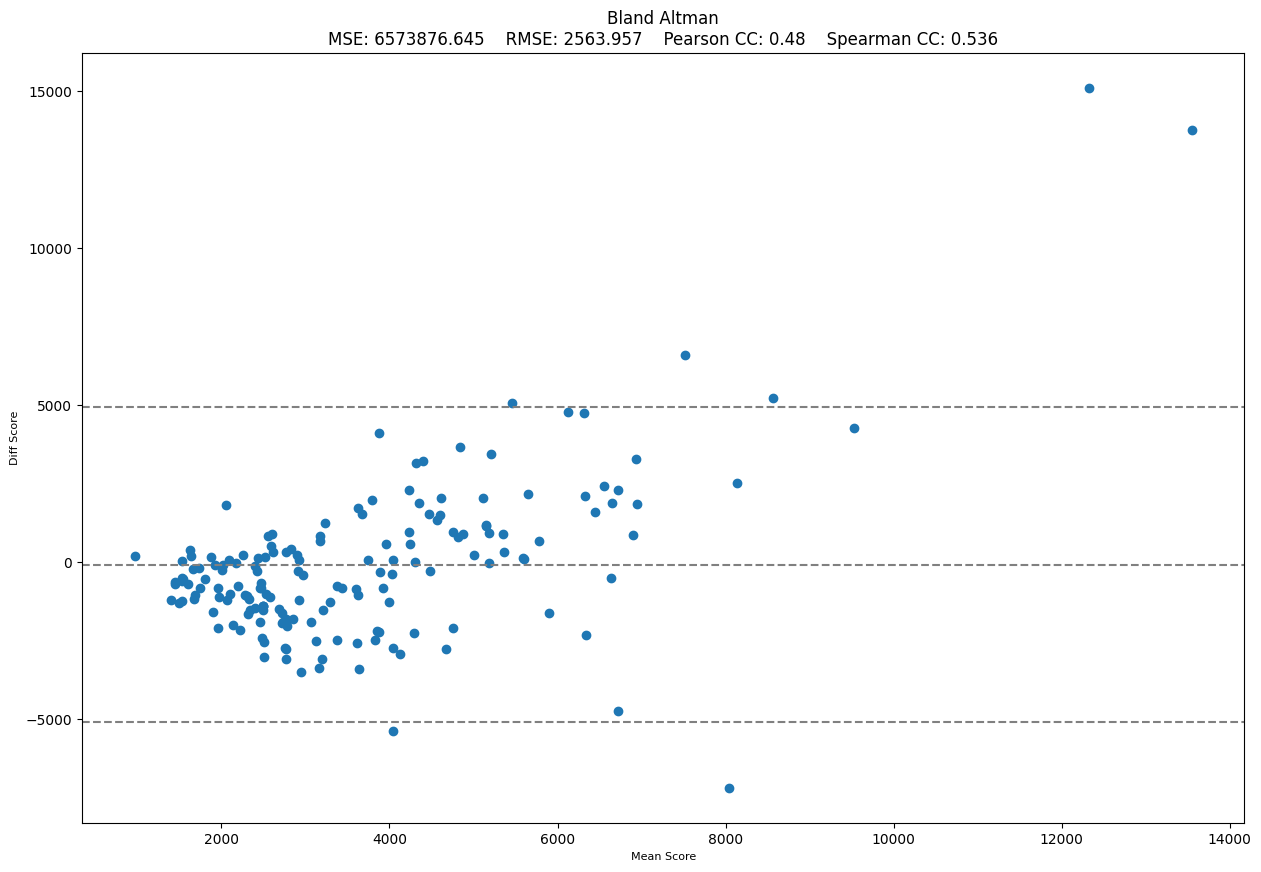

In [97]:
bland_altman_plot(y_test_all, y_hat_general,
                  output_scaler, # so that we can scores on actual scale
                 )

As we can see from the bland-altman plot, the root-mean-square error rather significantly improved. Now it sits around 2,500. Naturally, we would expect an improvement on the error due to the increase in input data. We can also note that the pearson correlation coefficient is dramatically increased from around 0.3 to almost 0.5. Our predictions are starting to correlate with the true values more, which is a less obvious improvement in light of more input data, but present, nonetheless.

Just as in the individual pilot models, the prediction differences fall within two standard deviations, which suggests some consistency across mean scores despite the fact that there is a visual increase as the mean score increases. Importantly, however, the standard deviation boundary has tightened closer to zero. This means that our model is making more accurate predictions.

## Pilot Multi-Task Model, Using Gradient Tape

Concatenating the input has helped us lower the mean-square error, but we should be able to improve our results by incorporating a multi-task prediction component to our general network. In this section, we will be using the same network from the previous section, but instead of a single general prediction, we will cater the final prediction layer to each pilot and backpropagate through the network using the gradients for each prediction (we will be using gradient tape to keep track of and apply the gradients). In other words, we are going back to making 34 different predictions, but now the first two layers of the 34 networks are shared and only the output layers for each pilot is different.

In [24]:
# adapted from LectureNotesMaster/03_LectureMulitTask.ipynb
# get weights of concatinated pilot data model to use as a base
w1 = generalized_mlp.get_layer('input_dense32').get_weights()
w2 = generalized_mlp.get_layer('mid_dense16').get_weights()
w_output = generalized_mlp.get_layer('output_layer').get_weights()

# create base structure for each model
inputs = Input(shape=(X_train_all.shape[1],))
shared_input = Dense(32, activation='relu', name = 'shared_input', trainable=False)(inputs)
shared_mlp = Dense(16, activation='relu', name = 'shared_middle', trainable=False)(shared_input)

# make a dictionary of models for each task
models_mtl = dict()

for x in tasks.keys():
    # add final dense layer for each pilot
    output_layer = Dense(1, activation='linear')(shared_mlp)

    # create model
    model = Model(inputs=inputs, outputs=output_layer)
    models_mtl[x] = model
    

    shared1 = models_mtl[x].get_layer('shared_input')
    shared2 = models_mtl[x].get_layer('shared_middle')
    unique_output = models_mtl[x].layers[-1]
    
    # set weights to be same as concatinated input model
    # shared parts of the network are NOT trainable (yet)
    shared1.set_weights(w1) 
    shared2.set_weights(w2)

    shared1.trainable = False
    shared2.trainable = False

    # output layer is trainable, but start with weights from concatinated input model
    unique_output.set_weights(w_output)

    unique_output.trainable = True

In [25]:
# adapted from LectureNotesMaster/03_LectureMulitTask.ipynb
def step(key_order, opt):
    '''
    One iteration of forward and backward propagation for each model
    in the dictionary of models using gradient tapes.
    '''
    # shuffle order of pilots for each epoch so gradient calculations are not
    # done in the same order every time
    shuffle(key_order) # in place operation

    # forward propagation, don't calculate gradients yet
    preds = {}
    loss = {}
    tapes = {}
    for x in key_order:
        with tf.GradientTape() as tape:
            tapes[x] = tape

            # make a prediction and calculate loss for each task
            preds[x] = models_mtl[x](X_train[x])
            loss[x] = mean_squared_error(y_train[x], preds[x])
            
    # batch update each model with the gradients
    for x in key_order:
        # calculate gradients for trainable parameters only
        grads = tapes[x].gradient(loss[x], models_mtl[x].trainable_variables)

        # apply gradients with the given optimizer
        opt[x].apply_gradients(zip(grads, models_mtl[x].trainable_variables))

In [82]:
# adapted from LectureNotesMaster/03_LectureMulitTask.ipynb
def get_optimizers(all_keys,learning_rate):
    # need separate optimizers for each output task
    opt = {}
    for x in all_keys:
        opt[x] = Adam(learning_rate=learning_rate)
    
    return opt

def train_models_mtl(num_epochs,layer1_trainable=True,layer2_trainable=True, learning_rate=0.001):
    all_keys = list(tasks.keys())
    opt = get_optimizers(all_keys,learning_rate)

    models_mtl['Pilot 34'].get_layer('shared_input').trainable = layer1_trainable
    models_mtl['Pilot 34'].get_layer('shared_middle').trainable = layer2_trainable

    for i in range(num_epochs):
        print('Epoch',i,end=', ')

        # single batch update
        step(all_keys,opt)
        
        # predict performance scores for each pilot in the current epoch
        y_mtl=[]
        yhat_mtl=[]
        for x in all_keys:
            # test on data, for tracking
            yhat_mlp = models_mtl[x].predict(X_test[x],verbose=0)
            y_mtl.append(y_test[x].ravel())
            yhat_mtl.append(yhat_mlp.ravel())
        
        # display current MSE
        mse = mean_squared_error(np.concatenate(y_mtl), np.concatenate(yhat_mtl))
        print('...MSE Validation:',mse.numpy())

In [83]:
%%time

# train multi-task models with the first two layers frozen
# use default learning rate
train_models_mtl(8,layer1_trainable=False,layer2_trainable=False)

Epoch 0, ...MSE Validation: 0.69863456
Epoch 1, ...MSE Validation: 0.6970934
Epoch 2, ...MSE Validation: 0.69559264
Epoch 3, ...MSE Validation: 0.6941573
Epoch 4, ...MSE Validation: 0.6927945
Epoch 5, ...MSE Validation: 0.6914962
Epoch 6, ...MSE Validation: 0.69024956
Epoch 7, ...MSE Validation: 0.68904084
CPU times: user 10.6 s, sys: 422 ms, total: 11 s
Wall time: 10.8 s


Now that we have a functioning multi-task model, and we have trained the output neuron, we would like to fine-tune the first two layers of that model as well. We will start with the layer closest to the output, with a decreased learning rate. We want the learning rate to be smaller for this section because we do not want to update these layers as much as the initial training process. Once we run that process to convergence, we will move on to fine-tuning the first layer (closest to the input). Again, we will be reducing our learning rate so that the weights of the model do not get updated too much. This is only a fine-tuning procedure after all.

In [28]:
%%time

# train multi-task models with only the first layer frozen (fine tuning second layer)
# use smaller learning rate (taking smaller tuning steps)
train_models_mtl(5,layer1_trainable=False,layer2_trainable=True, learning_rate=1e-6)

Epoch 0, ...MSE Validation: 0.72238976
Epoch 1, ...MSE Validation: 0.72239184
Epoch 2, ...MSE Validation: 0.7223939
Epoch 3, ...MSE Validation: 0.72239584
Epoch 4, ...MSE Validation: 0.7223979
CPU times: user 7.02 s, sys: 271 ms, total: 7.29 s
Wall time: 7.33 s


After 5 epochs, our MSE on the validation set seems to be converging. We can move on to fine tuning the next layer.

In [29]:
%%time

# train multi-task models with all layers trainable (fine tuning the whole model)
# use even smaller learning rate (do not want to change first layer weights very much at all)
train_models_mtl(20,layer1_trainable=True,layer2_trainable=True, learning_rate=1e-8)

Epoch 0, ...MSE Validation: 0.72239804
Epoch 1, ...MSE Validation: 0.7223982
Epoch 2, ...MSE Validation: 0.7223983
Epoch 3, ...MSE Validation: 0.7223984
Epoch 4, ...MSE Validation: 0.7223985
Epoch 5, ...MSE Validation: 0.72239864
Epoch 6, ...MSE Validation: 0.7223989
Epoch 7, ...MSE Validation: 0.722399
Epoch 8, ...MSE Validation: 0.72239906
Epoch 9, ...MSE Validation: 0.72239923
Epoch 10, ...MSE Validation: 0.72239935
Epoch 11, ...MSE Validation: 0.7223995
Epoch 12, ...MSE Validation: 0.7223997
Epoch 13, ...MSE Validation: 0.7223998
Epoch 14, ...MSE Validation: 0.72239995
Epoch 15, ...MSE Validation: 0.72240007
Epoch 16, ...MSE Validation: 0.7224002
Epoch 17, ...MSE Validation: 0.7224003
Epoch 18, ...MSE Validation: 0.7224004
Epoch 19, ...MSE Validation: 0.72240055
CPU times: user 29.5 s, sys: 988 ms, total: 30.5 s
Wall time: 30.6 s


Though we are still seeing slight improvements even after 20 epochs, the improvements are slight and we deem this model converged.

In [30]:
%%time

# predict performance scores for each pilot
y_mtl=[]
yhat_mtl=[]
for x in X_test.keys():
    yhat_mlp = models_mtl[x].predict(X_test[x], verbose=0)

    y_mtl.append(y_test[x].ravel())
    yhat_mtl.append(yhat_mlp.ravel())

CPU times: user 1.19 s, sys: 10.7 ms, total: 1.2 s
Wall time: 1.2 s


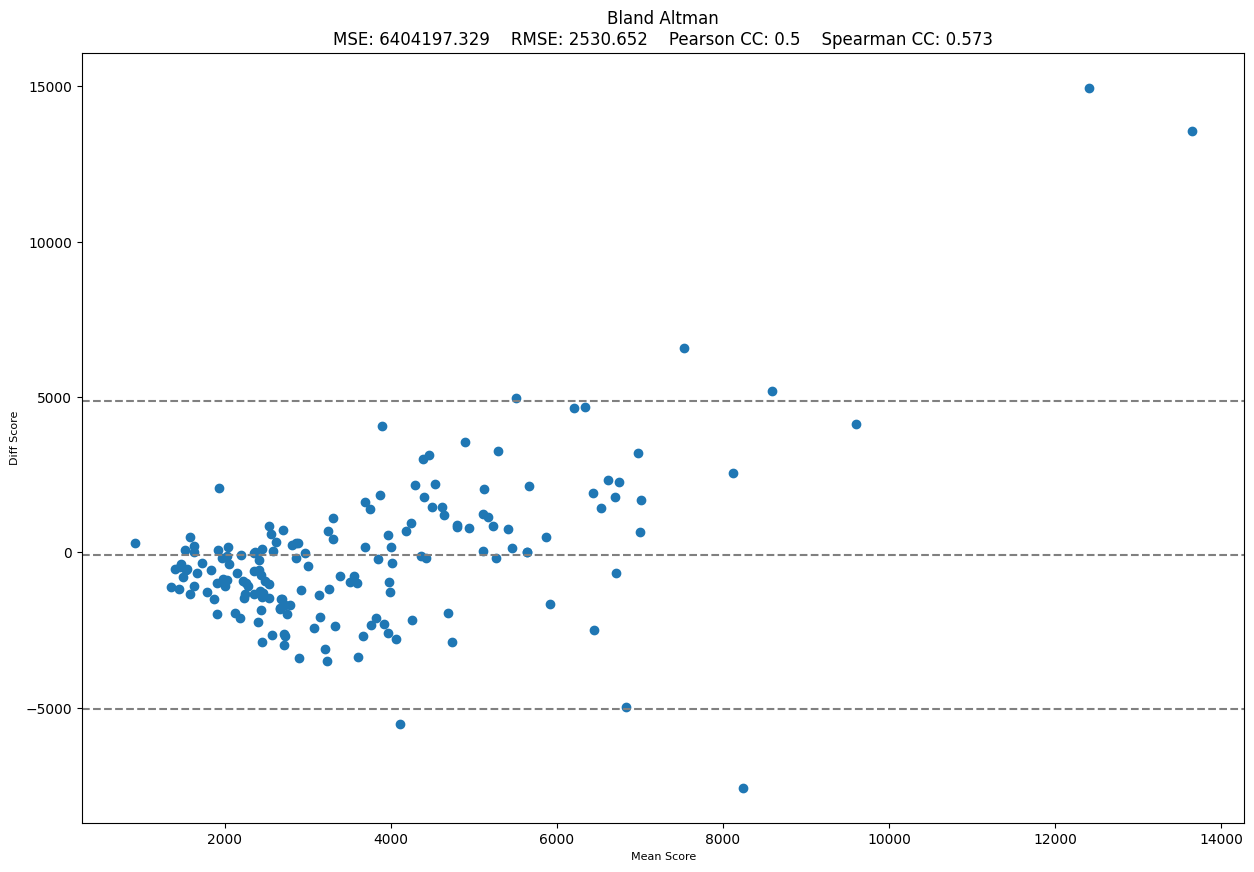

In [100]:
bland_altman_plot(np.concatenate(y_mtl), np.concatenate(yhat_mtl),output_scaler)

The MSE have improved yet again from our previous models, though it is not an enormous improvement. This is to be expected, however, because the multi-task element only significantly affects the output neurons. The main two dense layers of the MLP are shared across the multi-task networks and they are only fine-tuned from the general network. The correlation coefficient also improves, if only slightly. Our predictions are becoming more correlated to the true values.

The distribution across the mean scores does not seem visually different from the general model. There is still an increase in the vertical distribution of the data (difference between prediction and truth) as the mean score increases, though most of the differences still fall within the two standard deviations.

# Discussion of Results

In [34]:
import math
import scipy

#Calculate McNemar_test
def mcnemar_test(y_test,X_test, models_mtl,y_test_all,X_test_all, generalized_mlp):

    #Multi Task Model
    y_mtl1=[]
    yhat_mtl1=[]
    for x in X_test.keys():
        yhat_mlp1 = models_mtl[x].predict(X_test[x], verbose=0)

        y_mtl1.extend(y_test[x].ravel())
        yhat_mtl1.extend(yhat_mlp1.ravel())

    #General Model
    yhat2 = generalized_mlp.predict(X_test_all).ravel()

    #Rescale
    # yhat_mtl1 = scaler.inverse_transform(np.asarray(yhat_mtl1).reshape(-1,1))
    # y_mtl1 = scaler.inverse_transform(np.asarray(y_mtl1).reshape(-1,1))
    # yhat2 = scaler.inverse_transform(np.asarray(yhat2).reshape(-1,1))
    # y_test_all = scaler.inverse_transform(np.asarray(y_test_all).reshape(-1,1))
    # print(np.mean(np.subtract(yhat_mtl1,y_mtl1)))
    # print(np.mean(np.subtract(yhat2,y_test_all)))

    # Since these values are floats we must threshold what is considered as a correct guess
    # The value must be within +- 0.5 to be considered correct
    # Make logical vector of 1 == Correct, 0 == Incorrect
    yh1ANDyt = list(map(lambda z,y: math.isclose(z, y, rel_tol=0.5),yhat_mtl1,y_mtl1))
    yh2ANDyt = list(map(lambda z,y: math.isclose(z, y, rel_tol=0.5),yhat2,y_test_all)) 
    # print(yh1ANDyt)
    # print(yh2ANDyt)

    # Use Boolean logic to create vectors where 1 == Criteria met i.e Yes_Yes ==1 when both predictions are correct
    Yes_Yes = np.logical_and(yh1ANDyt,yh2ANDyt) 
    No_No = np.logical_and(np.logical_not(yh1ANDyt),np.logical_not(yh2ANDyt))
    Yes_No = np.logical_and(np.logical_xor(yh1ANDyt,yh2ANDyt),yh1ANDyt)
    No_Yes = np.logical_and(np.logical_xor(yh1ANDyt,yh2ANDyt),yh2ANDyt)

    # Sum vectors to count how many of each type
    Yes_YesSum = sum(Yes_Yes)
    No_NoSum = sum(No_No)
    Yes_NoSum = sum(Yes_No)
    No_YesSum = sum(No_Yes)
    contingency_table = [[Yes_YesSum, Yes_NoSum],[No_YesSum,No_NoSum]]
    
    # print(contingency_table)
    X2  = ((np.absolute(Yes_NoSum-No_YesSum)-1)**2)/(Yes_NoSum+No_YesSum)
    alpha = 0.05
    critical_value = scipy.stats.chi2.ppf(1-alpha, 1)

    if X2 <= critical_value:
        result = "Not Rejected, these models are not statistically different"

    else:
        result = "Rejected, these models are statistically different"

    print("Critical Value: ",critical_value)
    print("p-value is: ",X2)
    print("Null Hypothesis is: ",result)
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    
    return 

In [35]:
mcnemar_test(y_test,X_test, models_mtl,y_test_all,X_test_all, generalized_mlp)


6/6 [==============================] - 0s 752us/step
Critical Value:  3.841458820694124
p-value is:  0.5714285714285714
Null Hypothesis is:  Not Rejected, these models are not statistically different
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Since the output of the generalized and multi-task network are floats corresponding to a Cumulative Total Error score. Threshold criteria must be imposed to declare whether the model guessed correctly. Therefore we decided that the predicted value must be within +-0.5 of the standardized cumulative error score to be considered correct. Given this threshold and the McNemar Test, these models are not statistically different. However, according to the Bland Altman Test, Pearson score, MSE and RMS, the multi-task model performs slightly better than the generalized model as the MSE was lower and the Pearson score and Spearman score was slightly higher.  With a Pearson score of 0.5 compared to 0.48 and Spearman score of 0.57 compared to 0.54 it is clear multi-task model predictions are very slightly more correlated with the test data than the generalized model.

# Additional Analysis: 

## Update Task models in small batches

Since we explored updating the multitask model using gradient tape, it is in our best interest to also explore how the model would react to updating the multitask layers using small batch

In [50]:
# adapted from LectureNotesMaster/03_LectureMulitTask.ipynb

# create base structure for each model
inputs = Input(shape=(X_train_all.shape[1],))
shared_input = Dense(32, activation='relu', name = 'shared_input', trainable=False)(inputs)
shared_mlp = Dense(16, activation='relu', name = 'shared_middle', trainable=False)(shared_input)

# make a dictionary of models for each task
models_mtl_batch = dict()

for x in tasks.keys():
    personal_layer = Dense(10, activation='relu')(shared_mlp)
    output_layer = Dense(1)(personal_layer)
    model = Model(inputs=inputs, outputs=output_layer)
    model.compile(optimizer='sgd', loss='mean_squared_error')
    models_mtl_batch[x] = model

In [51]:
EPOCHS = 5
from random import shuffle

all_keys = list(X_train.keys())
for i in range(EPOCHS):
    print('Epoch',i,end=', ')
    shuffle(all_keys)
    for x in all_keys:
        # Fit on random batch of gradients
        models_mtl_batch[x].fit(X_train[x],y_train[x], verbose=0, 
                          batch_size=3,
                          epochs=1,
                          steps_per_epoch=2, 
                          shuffle=True)



Epoch 0, WARNING:tensorflow:5 out of the last 167 calls to <function Model.make_train_function.<locals>.train_function at 0x7fb71ebf2040> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
Epoch 1, Epoch 2, Epoch 3, Epoch 4, 

In [53]:
y_mtl_batch=[]
yhat_mtl_batch=[]

for x in X_test.keys():
    yhat_mlp_batch = models_mtl_batch[x].predict(X_test[x])

    y_mtl_batch.append(y_test[x].ravel())
    yhat_mtl_batch.append(yhat_mlp_batch.ravel())


1/1 [==============================] - 0s 36ms/step


In [71]:
def mcnemar_test_dualmtl(y_test,X_test, models_mtl,models_mtl2):

    #Multi Task Model
    y_mtl1=[]
    yhat_mtl1=[]
    for x in X_test.keys():
        yhat_mlp1 = models_mtl[x].predict(X_test[x], verbose=0)

        y_mtl1.extend(y_test[x].ravel())
        yhat_mtl1.extend(yhat_mlp1.ravel())

    #Multi Task Model
    y_mtl2=[]
    yhat_mtl2=[]
    for x in X_test.keys():
        yhat_mlp2 = models_mtl2[x].predict(X_test[x], verbose=0)

        y_mtl2.extend(y_test[x].ravel())
        yhat_mtl2.extend(yhat_mlp2.ravel())

    # Since these values are floats we must threshold what is considered as a correct guess
    # The value must be within +- 0.5 to be considered correct
    # Make logical vector of 1 == Correct, 0 == Incorrect
    yh1ANDyt = list(map(lambda z,y: math.isclose(z, y, rel_tol=0.5),yhat_mtl1,y_mtl1))
    yh2ANDyt = list(map(lambda z,y: math.isclose(z, y, rel_tol=0.5),yhat_mtl2,y_mtl2)) 
    # print(yh1ANDyt)
    # print(yh2ANDyt)

    # Use Boolean logic to create vectors where 1 == Criteria met i.e Yes_Yes ==1 when both predictions are correct
    Yes_Yes = np.logical_and(yh1ANDyt,yh2ANDyt) 
    No_No = np.logical_and(np.logical_not(yh1ANDyt),np.logical_not(yh2ANDyt))
    Yes_No = np.logical_and(np.logical_xor(yh1ANDyt,yh2ANDyt),yh1ANDyt)
    No_Yes = np.logical_and(np.logical_xor(yh1ANDyt,yh2ANDyt),yh2ANDyt)

    # Sum vectors to count how many of each type
    Yes_YesSum = sum(Yes_Yes)
    No_NoSum = sum(No_No)
    Yes_NoSum = sum(Yes_No)
    No_YesSum = sum(No_Yes)
    contingency_table = [[Yes_YesSum, Yes_NoSum],[No_YesSum,No_NoSum]]
    
    # print(contingency_table)
    X2  = ((np.absolute(Yes_NoSum-No_YesSum)-1)**2)/(Yes_NoSum+No_YesSum)
    alpha = 0.05
    critical_value = scipy.stats.chi2.ppf(1-alpha, 1)

    if X2 <= critical_value:
        result = "Not Rejected, these models are not statistically different"

    else:
        result = "Rejected, these models are statistically different"

    print("Critical Value: ",critical_value)
    print("p-value is: ",X2)
    print("Null Hypothesis is: ",result)
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    
    return

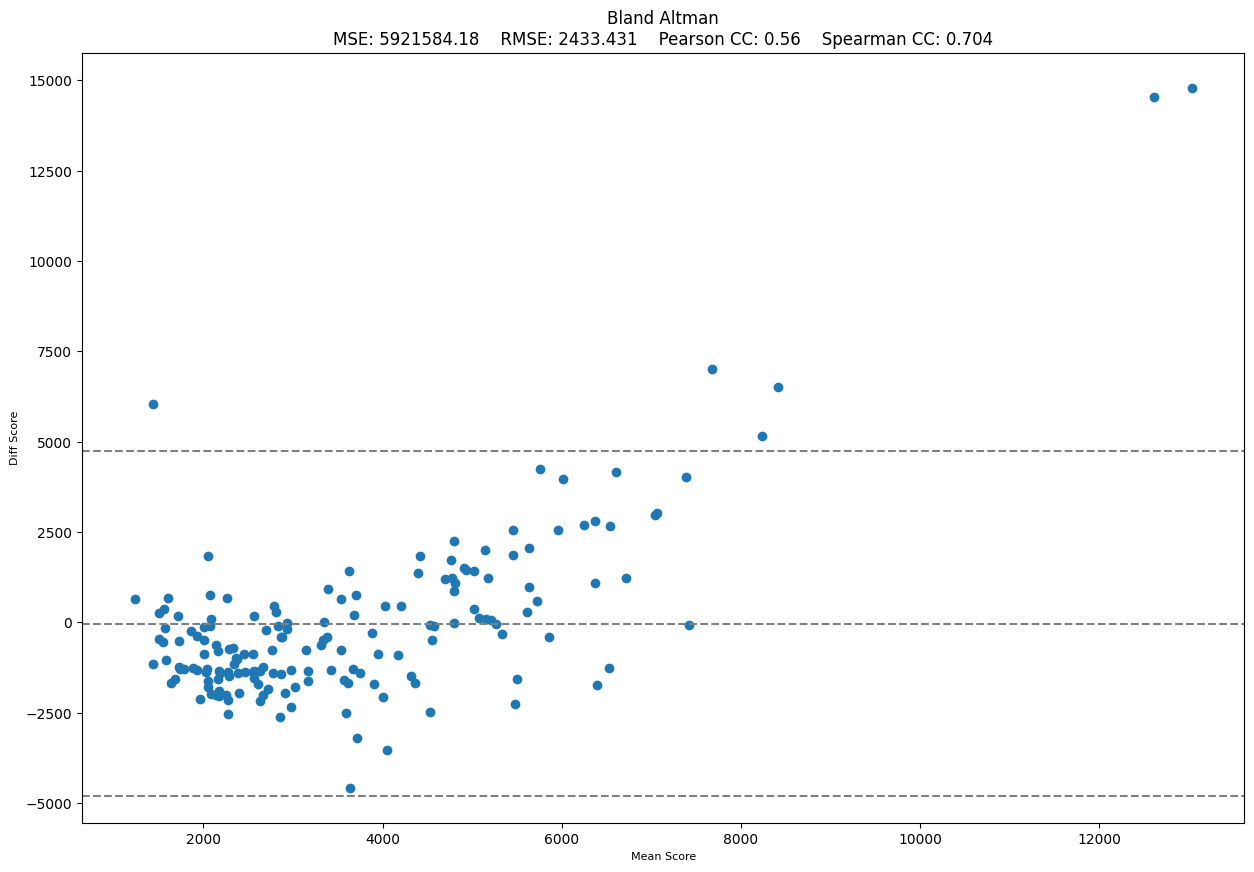

In [101]:
bland_altman_plot(np.concatenate(y_mtl_batch), 
                  np.concatenate(yhat_mtl_batch),output_scaler)

In [72]:
mcnemar_test_dualmtl(y_test,X_test, models_mtl,models_mtl_batch)

Critical Value:  3.841458820694124
p-value is:  0.9014084507042254
Null Hypothesis is:  Not Rejected, these models are not statistically different
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Since the output of the two multi-task networks are floats corresponding to a Cumulative Total Error score. Threshold criteria must be imposed to declare whether the model guessed correctly. Therefore we decided that the predicted value must be within +-0.5 of the standardized cumulative error score to be considered correct. Given this threshold and the McNemar Test, these models are not statistically different. However, according to the Bland Altman Test, Pearson score, MSE, and RMS the batch-fitted multi-task model performs slightly better than the generalized model as the MSE was lower and the Pearson score and Spearman score was slightly higher. With a Pearson score of 0.56 compared to 0.5 and Spearman score of 0.7 compared to 0.57 it is clear that the batch-fitted multi-task model predictions are more correlated with the test data.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d4e4a66a-823a-485c-ae16-68e79ef46f18' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>